In [3]:
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

np.random.seed(1234)

#Define the distance formula.
def euclidean(x1, x2):
   return np.sqrt(np.sum((x1 - x2)**2))

def manhattan(x1, x2):
   return np.sum(np.abs(x1 - x2)) 

def evaluate_acc(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self

    def predict(self, X, distance="euclidean"):
        y_pred = [self.helper_predict(x, distance) for x in X]
        return np.array(y_pred)

    def helper_predict(self, x, distance):
        if (distance == "euclidean"):
          distances = [euclidean(x, x_train) for x_train in self.X_train]
        else:
          distances = [manhattan(x, x_train) for x_train in self.X_train]
        
        k_idx = np.argsort(distances)[:self.k]
        
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

Mounted at /content/drive


# Breast Cancer Dataset

In [41]:
raw_df = pd.read_csv("/content/drive/MyDrive/COMP551/Proj_1/breast_cancer_wisconsin.csv")

In [40]:
df =raw_df[~raw_df.eq('?').any(1)]

#df.drop_duplicates(inplace=True)

df = df.apply(pd.to_numeric)

df.drop("id",axis=1, inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity_of_Cell_Size,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity_of_Cell_Shape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_Chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
Class,683.0,2.699854,0.954592,2.0,2.0,2.0,4.0,4.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity_of_Cell_Size,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity_of_Cell_Shape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_Chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
Class,683.0,2.699854,0.954592,2.0,2.0,2.0,4.0,4.0


### Histograms for features used

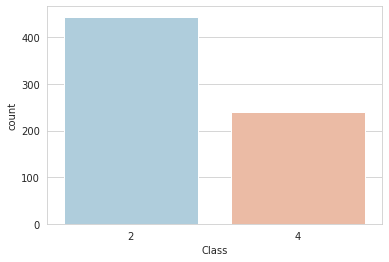

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=df,palette='RdBu_r')

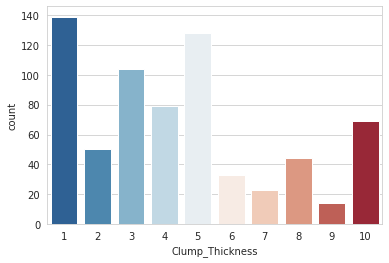

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Clump_Thickness',data=df,palette='RdBu_r')

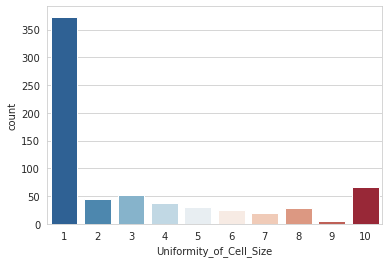

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Uniformity_of_Cell_Size',data=df,palette='RdBu_r')

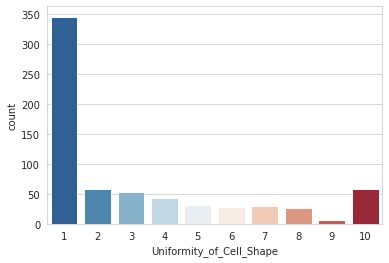

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Uniformity_of_Cell_Shape',data=df,palette='RdBu_r')


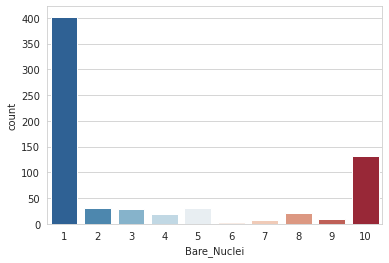

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Bare_Nuclei',data=df,palette='RdBu_r')

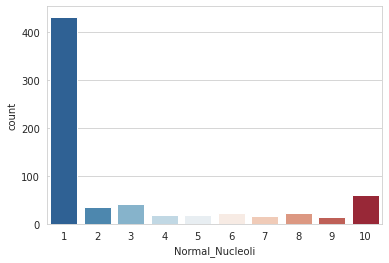

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Normal_Nucleoli',data=df,palette='RdBu_r')

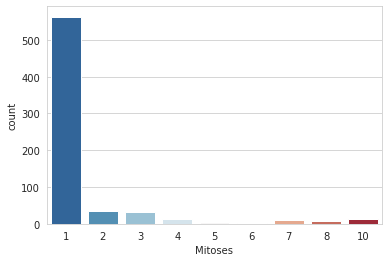

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Mitoses',data=df,palette='RdBu_r')


In [42]:
X, y = df.iloc[0:,0:9], df.iloc[:,9]

X=X.values
y=y.values

(N,D), C = X.shape, np.max(y)+1
#print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')
#print(y.shape)

def custom_train_and_test_split(X, y):
    arrRand = np.random.rand(X.shape[0])
    custom_split = arrRand < np.percentile(arrRand, 70)

    X_train = X[custom_split]
    y_train = y[custom_split]
    X_test =  X[~custom_split]
    y_test = y[~custom_split]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = custom_train_and_test_split(X,y)
#X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,test_size=0.30)

### Accuracy using Euclidean distance

In [43]:
k = 5

for k in range(1,16):
    model = KNN(k=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("for k= ",k)
    print("KNN accuracy: ", evaluate_acc(y_test, predictions))

for k=  1
KNN accuracy:  0.9512195121951219
for k=  2
KNN accuracy:  0.9512195121951219
for k=  3
KNN accuracy:  0.975609756097561
for k=  4
KNN accuracy:  0.9658536585365853
for k=  5
KNN accuracy:  0.975609756097561
for k=  6
KNN accuracy:  0.975609756097561
for k=  7
KNN accuracy:  0.9707317073170731
for k=  8
KNN accuracy:  0.9707317073170731
for k=  9
KNN accuracy:  0.975609756097561
for k=  10
KNN accuracy:  0.9707317073170731
for k=  11
KNN accuracy:  0.9707317073170731
for k=  12
KNN accuracy:  0.9707317073170731
for k=  13
KNN accuracy:  0.9707317073170731
for k=  14
KNN accuracy:  0.9707317073170731
for k=  15
KNN accuracy:  0.9658536585365853


#### Confusion matrix

In [48]:
model = KNN(k=5)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Confusion Matrix:")
print(y_test.shape)
print(predictions)
print(confusion_matrix(y_test,predictions))
print("====")
print("Classification Report")
print(classification_report(y_test,predictions))

Confusion Matrix:
(205,)
[4 2 2 2 2 4 2 4 2 2 2 4 4 2 4 4 4 2 2 2 2 4 2 2 2 4 2 4 4 4 2 2 2 4 4 4 2
 2 2 4 2 2 4 4 2 2 2 2 2 2 4 4 4 2 4 4 4 2 2 2 4 4 2 2 4 4 2 2 2 4 4 2 2 2
 2 4 2 2 4 4 2 4 4 2 4 4 4 4 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 4 4 2 2 2 2 2 2
 4 2 2 2 4 2 2 2 2 2 2 4 4 4 2 2 4 2 2 2 2 2 4 2 2 2 2 2 4 4 2 4 4 2 2 2 2
 4 2 2 2 2 2 4 2 2 4 2 2 2 2 2 4 2 2 2 2 2 2 4 4 4 2 2 4 2 2 4 2 2 4 2 2 2
 2 2 4 4 2 2 2 2 4 2 2 2 4 2 2 2 2 2 2 2]
[[134   3]
 [  2  66]]
====
Classification Report
              precision    recall  f1-score   support

           2       0.99      0.98      0.98       137
           4       0.96      0.97      0.96        68

    accuracy                           0.98       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205



### Accuracy using Manhattan distance

In [17]:
k = 5

for k in range(1,16):
    model = KNN(k=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test, "manhattan")
    print("for k= ",k)
    print("KNN accuracy: ", evaluate_acc(y_test, predictions))

for k=  1
KNN accuracy:  0.9609756097560975
for k=  2
KNN accuracy:  0.9609756097560975
for k=  3
KNN accuracy:  0.9707317073170731
for k=  4
KNN accuracy:  0.9658536585365853
for k=  5
KNN accuracy:  0.9707317073170731
for k=  6
KNN accuracy:  0.975609756097561
for k=  7
KNN accuracy:  0.9658536585365853
for k=  8
KNN accuracy:  0.975609756097561
for k=  9
KNN accuracy:  0.9707317073170731
for k=  10
KNN accuracy:  0.9707317073170731
for k=  11
KNN accuracy:  0.9658536585365853
for k=  12
KNN accuracy:  0.9658536585365853
for k=  13
KNN accuracy:  0.9707317073170731
for k=  14
KNN accuracy:  0.9707317073170731
for k=  15
KNN accuracy:  0.9560975609756097


#### Confusion Matrix

In [18]:
model = KNN(k=6)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions))
print("====")
print("Classification Report")
print(classification_report(y_test,predictions))

Confusion Matrix:
[[134   3]
 [  2  66]]
====
Classification Report
              precision    recall  f1-score   support

           2       0.99      0.98      0.98       137
           4       0.96      0.97      0.96        68

    accuracy                           0.98       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205



### Accuracy from sci-kit learn

In [19]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

print(neigh.score(X_test, y_test))

0.9512195121951219


### Decision Boundaries

# Hepatitis Dataset

In [20]:
from google.colab import drive
drive.mount('/content/drive')
np.random.seed(1234)
import pandas as pd

path = '/content/drive/MyDrive/COMP551/Proj_1/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df_hep = pd.read_csv(path + 'hepatitis.csv', na_values='?')

df_hep['ALBUMIN'].fillna(round(df_hep['ALBUMIN'].mean(), 1), inplace=True)
df_hep['BILIRUBIN'].fillna(round(df_hep.BILIRUBIN.mean(), 1), inplace=True)
df_hep['ASCITES'].fillna(np.random.randint(1,2), inplace=True)
df_hep['VARICES'].fillna(np.random.randint(1,2), inplace=True)
df_hep['SPIDERS'].fillna(np.random.randint(1,2), inplace=True)
df_hep['HISTOLOGY'].fillna(np.random.randint(1,2), inplace=True)

df_hep=(df_hep-df_hep.min())/(df_hep.max()-df_hep.min())

X = df_hep[['ALBUMIN', 'BILIRUBIN', 'ASCITES', 'VARICES', 'SPIDERS', 'HISTOLOGY']]
y = df_hep.iloc[:,0]

X = X.values
y = y.values

In [22]:
df_hep[['ALBUMIN', 'BILIRUBIN', 'ASCITES', 'VARICES', 'SPIDERS', 'HISTOLOGY']]

,ALBUMIN,BILIRUBIN,ASCITES,VARICES,SPIDERS,HISTOLOGY
0,0.441860,0.090909,1.0,1.0,1.0,0.0
1,0.325581,0.077922,1.0,1.0,1.0,0.0
2,0.441860,0.051948,1.0,1.0,1.0,0.0
3,0.441860,0.051948,1.0,1.0,1.0,0.0
4,0.441860,0.090909,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...
150,0.279070,0.948052,0.0,0.0,0.0,1.0
151,0.511628,0.077922,1.0,1.0,1.0,1.0
152,0.465116,0.064935,1.0,1.0,0.0,1.0
153,0.465116,0.155844,1.0,0.0,0.0,1.0


### Histograms for features used

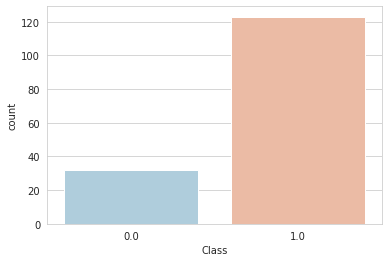

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=df_hep,palette='RdBu_r')

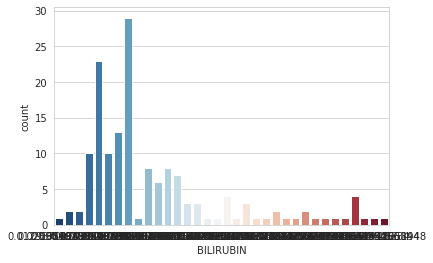

In [24]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.countplot(x='BILIRUBIN',data=df_hep,palette='RdBu_r')

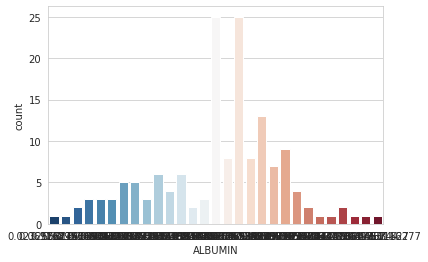

In [25]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.countplot(x='ALBUMIN',data=df_hep,palette='RdBu_r')

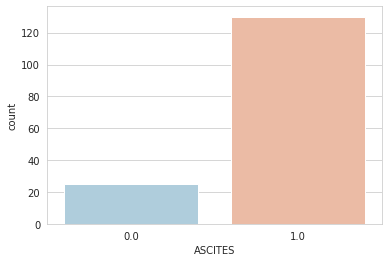

In [26]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.countplot(x='ASCITES',data=df_hep,palette='RdBu_r')

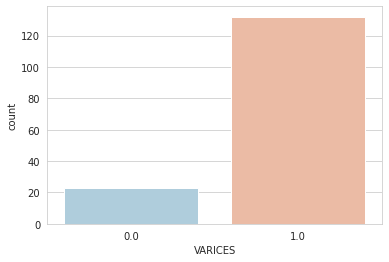

In [27]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.countplot(x='VARICES',data=df_hep,palette='RdBu_r')

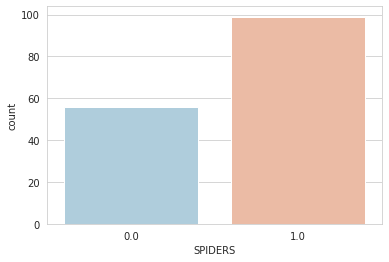

In [28]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.countplot(x='SPIDERS',data=df_hep,palette='RdBu_r')

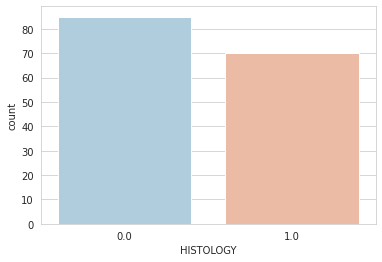

In [29]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.countplot(x='HISTOLOGY',data=df_hep,palette='RdBu_r')

### Accuracy using Euclidean distance

In [30]:
(N,D), C = X.shape, np.max(y) + 1
# print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')
# print(y.shape)

X_train, y_train = X[:135], y[:135]
X_test, y_test = X[20:], y[20:]

for k in range(1,10):
  model = KNN(k=k)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test, "euclidean")
  print("for k= ",k)
  print("KNN accuracy: ", evaluate_acc(y_test, predictions))
  accuracy = evaluate_acc(y_test, predictions)

for k=  1
KNN accuracy:  0.9333333333333333
for k=  2
KNN accuracy:  0.9333333333333333
for k=  3
KNN accuracy:  0.8296296296296296
for k=  4
KNN accuracy:  0.8592592592592593
for k=  5
KNN accuracy:  0.8
for k=  6
KNN accuracy:  0.8666666666666667
for k=  7
KNN accuracy:  0.8148148148148148
for k=  8
KNN accuracy:  0.8518518518518519
for k=  9
KNN accuracy:  0.8444444444444444


#### Confusion Matrix

In [31]:
model = KNN(k=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions))
print("====")
print("Classification Report")
print(classification_report(y_test,predictions))

Confusion Matrix:
[[27  4]
 [ 5 99]]
====
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86        31
         1.0       0.96      0.95      0.96       104

    accuracy                           0.93       135
   macro avg       0.90      0.91      0.91       135
weighted avg       0.93      0.93      0.93       135



### Accuracy using Manhattan distance

In [32]:
(N,D), C = X.shape, np.max(y) + 1
# print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')
# print(y.shape)

X_train, y_train = X[:135], y[:135]
X_test, y_test = X[20:], y[20:]

for k in range(1,10):
  model = KNN(k=k)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test, "manhattan")
  print("for k= ",k)
  print("KNN accuracy: ", evaluate_acc(y_test, predictions))
  accuracy = evaluate_acc(y_test, predictions)

for k=  1
KNN accuracy:  0.9333333333333333
for k=  2
KNN accuracy:  0.9333333333333333
for k=  3
KNN accuracy:  0.8444444444444444
for k=  4
KNN accuracy:  0.8518518518518519
for k=  5
KNN accuracy:  0.8
for k=  6
KNN accuracy:  0.8592592592592593
for k=  7
KNN accuracy:  0.8148148148148148
for k=  8
KNN accuracy:  0.8444444444444444
for k=  9
KNN accuracy:  0.8518518518518519


In [33]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

print(neigh.score(X_test, y_test))

0.9333333333333333


#### Confusion Matrix

In [34]:
model = KNN(k=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions))
print("====")
print("Classification Report")
print(classification_report(y_test,predictions))

Confusion Matrix:
[[27  4]
 [ 5 99]]
====
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86        31
         1.0       0.96      0.95      0.96       104

    accuracy                           0.93       135
   macro avg       0.90      0.91      0.91       135
weighted avg       0.93      0.93      0.93       135



### Accuracy from sci-kit learn

In [35]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

print(neigh.score(X_test, y_test))

0.9333333333333333


## Decision Boundaries
To draw the decision boundary we classify all the points on a 2D grid. The `meshgrid` function creates all the points on the grid by taking discretizations of horizontal and vertical axes.

In [36]:
# we can make the grid finer by increasing the number of samples from 200 to higher value
# x0v = np.linspace(np.min(X[:,4]), np.max(X[:,4]), 80)
# x1v = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 80)

# #to features values as a mesh  
# x0, x1 = np.meshgrid(x0v, x1v)
# x_all = np.vstack((x0.ravel(),x1.ravel())).T

# for k in range(1,4):
#   model = KNN(k=k)

#   y_train_prob = np.zeros((y_train.shape[0], 3))
#   y_train_prob[np.arange(y_train.shape[0]), y_train.astype(int)] = 1

#   #to get class probability of all the points in the 2D grid
#   print(X_train.shape)
#   print(y_train.shape)
#   print(type(model.fit(X_train, y_train)))
#   y_prob_all, _ = model.fit(X_train, y_train).predict(x_all)

#   y_pred_all = np.zeros_like(y_prob_all)
#   y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

#   plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
#   plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)

#   plt.show()

(135, 6)
(135,)
<class '__main__.KNN'>


ValueError: ignored